In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,classification_report,auc


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/DATA PYTHON/insurance_claims.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
ssas1=df["collision_type"].mode()[0]
data["collision_type"]=np.where(data["collision_type"]=='?',ssas1,data["collision_type"])

In [ ]:
data["police_report_available"]=data["police_report_available"].replace('?',np.nan)
data["property_damage"]=data["property_damage"].replace('?',np.nan)

In [ ]:
pp=data['police_report_available'].mode()
data['police_report_available']=data['police_report_available'].fillna(pp[0])
pp1=data['property_damage'].mode()
data['property_damage']=data['property_damage'].fillna(pp1[0])

<ipython-input-156-b3fc5ae11f9b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_coumn=data.groupby(['insured_education_level','fraud_reported']).mean()["policy_annual_premium"]


<Axes: xlabel='insured_education_level'>

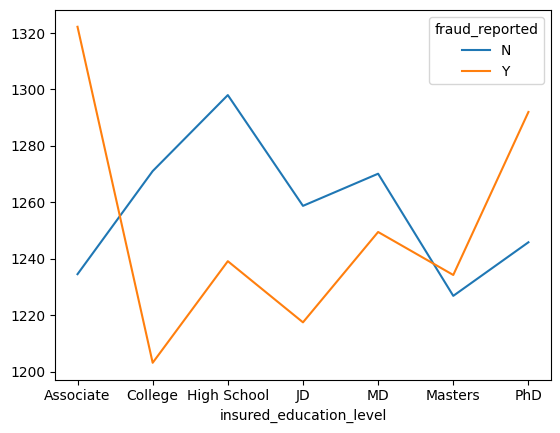

In [ ]:
new_coumn=data.groupby(['insured_education_level','fraud_reported']).mean()["policy_annual_premium"]
new_coumn.unstack().plot()

<ipython-input-157-a7612f8d5873>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_average=data.groupby(['insured_occupation','fraud_reported']).mean()['total_claim_amount']


<Axes: xlabel='insured_occupation'>

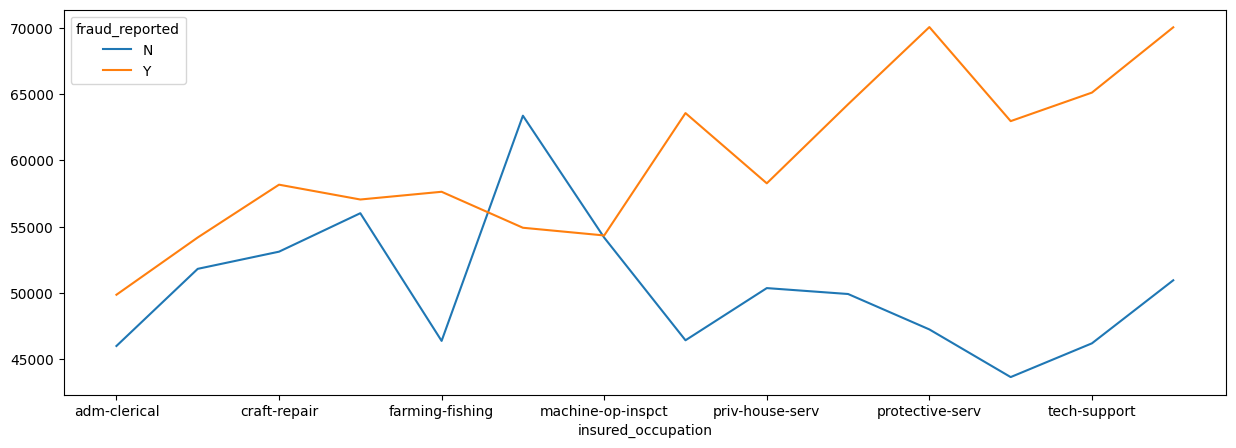

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
new_average=data.groupby(['insured_occupation','fraud_reported']).mean()['total_claim_amount']
new_average.unstack().plot(ax=ax)

<ipython-input-158-62e32ed41133>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


[Text(0.5, 0, 'months_as_customer'),
 Text(1.5, 0, 'age'),
 Text(2.5, 0, 'policy_number'),
 Text(3.5, 0, 'policy_deductable'),
 Text(4.5, 0, 'policy_annual_premium'),
 Text(5.5, 0, 'umbrella_limit'),
 Text(6.5, 0, 'insured_zip'),
 Text(7.5, 0, 'capital-gains'),
 Text(8.5, 0, 'capital-loss'),
 Text(9.5, 0, 'incident_hour_of_the_day'),
 Text(10.5, 0, 'number_of_vehicles_involved'),
 Text(11.5, 0, 'bodily_injuries'),
 Text(12.5, 0, 'witnesses'),
 Text(13.5, 0, 'total_claim_amount'),
 Text(14.5, 0, 'injury_claim'),
 Text(15.5, 0, 'property_claim'),
 Text(16.5, 0, 'vehicle_claim'),
 Text(17.5, 0, 'auto_year'),
 Text(18.5, 0, '_c39')]

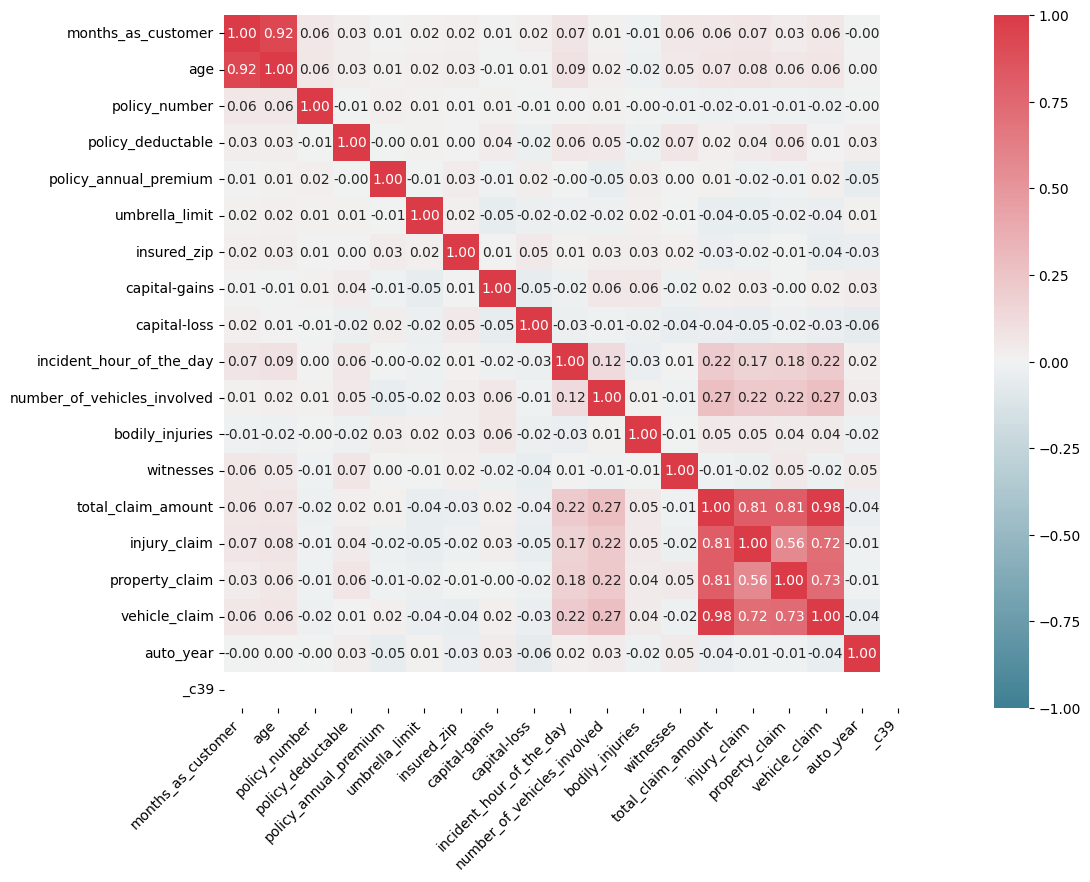

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 9))

corr = data.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    square=True,
    annot=True,  # This is where you specify annot=True
    fmt=".2f"    # This is the format for the annotation (2 decimal places)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


In [ ]:
#Remove Less Correlated Columns
deleteCols = ["policy_number", "policy_bind_date", "insured_zip", "incident_location", "incident_date", "_c39"]
data = data.drop(deleteCols, axis=1)
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [ ]:
data.dtypes

months_as_customer         int64
age                        int64
policy_deductable          int64
policy_annual_premium    float64
umbrella_limit             int64
                          ...   
auto_model_Tahoe           uint8
auto_model_Ultima          uint8
auto_model_Wrangler        uint8
auto_model_X5              uint8
auto_model_X6              uint8
Length: 159, dtype: object

In [ ]:
#One-hot encoding all categorical columns except output column(i.e. fraud_reported)
list_hot_encoded = []
for column in data.columns:
    if(data[column].dtypes==object and column != 'fraud_reported'):
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        list_hot_encoded.append(column)
#Drop hot-encoded columns
data = data.drop(list_hot_encoded, axis=1)

#Binary encoder for output column
data['fraud_reported'] = data['fraud_reported'].map( {'Y':1, 'N':0})

data

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,0,0,0,0,0,0,0,0,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,0,0,0,0,0,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,1,0,0,0,0,0,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,1,0,0,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,0,0,0,0,0,0,0,0,0,0
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,0,0,0,0,0,0,0,0,0,0
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,0,0,0,0,0,0,0,0,0,0
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 159 entries, months_as_customer to auto_model_X6
dtypes: float64(1), int64(16), uint8(142)
memory usage: 271.6 KB


In [ ]:
data.isnull().sum()

months_as_customer       0
age                      0
policy_deductable        0
policy_annual_premium    0
umbrella_limit           0
                        ..
auto_model_Tahoe         0
auto_model_Ultima        0
auto_model_Wrangler      0
auto_model_X5            0
auto_model_X6            0
Length: 159, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

##SPLITTING

In [ ]:
X=data.drop('fraud_reported',axis=1)
y=data["fraud_reported"]

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame (X_train) into a NumPy array
scaled_data = scaler.fit_transform(X)

# Convert the scaled NumPy array back to a DataFrame
X = pd.DataFrame(scaled_data, columns=X.columns)

##IDENTIFY IMBALNCED CLASS

In [ ]:
from collections import Counter
counter=Counter(y)
counter

Counter({1: 247, 0: 753})

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)  # You can adjust the sampling strategy as needed

# Fit and apply SMOTE to your feature matrix X and target variable y
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
columns = data.select_dtypes(include=['object'])

for col_name in columns:
    try:
        data[col_name] = data[col_name].astype('int64')
    except ValueError:
        print(f"Could not convert column '{col_name}' to int64")

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=123)

In [ ]:
random=RandomForestClassifier(n_estimators=50, random_state=123,max_features=12)
random.fit(X_train,y_train)

random_test=random.predict(X_test)
random_train=random.predict(X_train)

random_test_accuracy=accuracy_score(y_test,random_test)
random_train_accuracy=accuracy_score(y_train,random_train)

print("the accuracy score of test is :",random_test_accuracy)
print("the accuracy score of train is :",random_train_accuracy)

the accuracy score of test is : 0.8827433628318584
the accuracy score of train is : 1.0


In [ ]:
from sklearn.model_selection import GridSearchCV
rf = {
  'n_estimators':[10, 50, 100],
   'max_depth': [None, 5 ,10],
}

rf_model1 = RandomForestClassifier(random_state=42)
rf_grid1 = GridSearchCV(estimator=rf_model1, param_grid=rf, cv=5)
rf_grid1.fit(X_train, y_train)
rf_preds1_test = rf_grid1.predict(X_test)
rf_preds1_train = rf_grid1.predict(X_train)
rf_accuracy1 = accuracy_score(y_test, rf_preds1_test)
print("Random Forest Accuracy:", rf_accuracy1)
print("Random Forest Best Parameters:", rf_grid1.best_params_)

print(classification_report(y_test,rf_preds1_test))

Random Forest Accuracy: 0.8783185840707964
Random Forest Best Parameters: {'max_depth': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       229
           1       0.89      0.86      0.87       223

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452



Confusion Matrix (Test Set):
[[205  24]
 [ 31 192]]
AUC-ROC: 0.9564102061996984


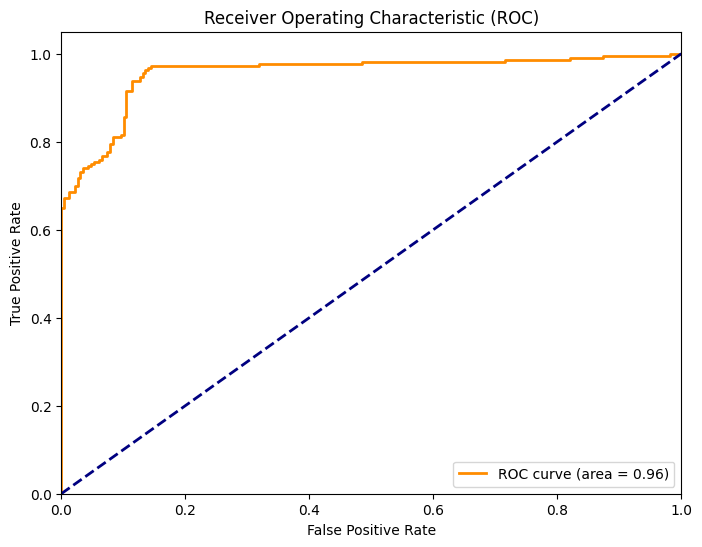

In [ ]:
# Calculate the confusion matrix for the test set
from sklearn.metrics import confusion_matrix

confusion_matrix_rf = confusion_matrix(y_test, rf_preds1_test)

# Print the confusion matrix
print("Confusion Matrix (Test Set):")
print(confusion_matrix_rf)

# Calculate the probability scores for the positive class (class 1)
y_test_prob_rf = rf_grid1.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_rf)

# Calculate AUC
roc_auc_rf = auc(fpr, tpr)

# Print AUC-ROC score
print("AUC-ROC:", roc_auc_rf)

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_rf)

# Calculate AUC
roc_auc_rf = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_data = lgb.Dataset(X_train, label=y_train)

# Define the LightGBM parameters
params = {
    "objective": "binary",
    "metric": "binary_logloss",
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100)

# Make predictions on the test set
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Convert predicted probabilities to binary labels (0 or 1)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 530, number of negative: 524
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5809
[LightGBM] [Info] Number of data points in the train set: 1054, number of used features: 153
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502846 -> initscore=0.011385
[LightGBM] [Info] Start training from score 0.011385
Accuracy: 0.8960176991150443
Confusion Matrix:
[[204  25]
 [ 22 201]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       229
           1       0.89      0.90      0.90       223

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

# Create the LightGBM model
lgbm = LGBMClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_model = LGBMClassifier(**best_params)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

# Print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

AUC-ROC: 0.9554702645544089


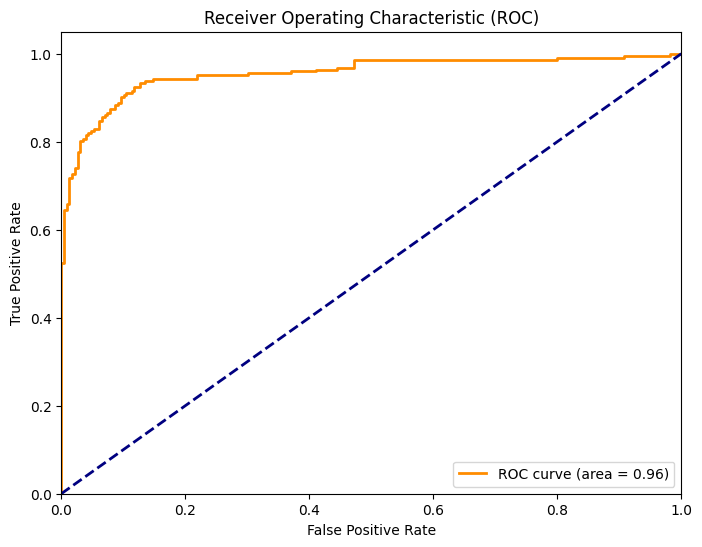

In [ ]:
# Calculate the probability scores for the positive class (class 1)
y_pred_prob = final_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Print AUC-ROC score
print("AUC-ROC:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


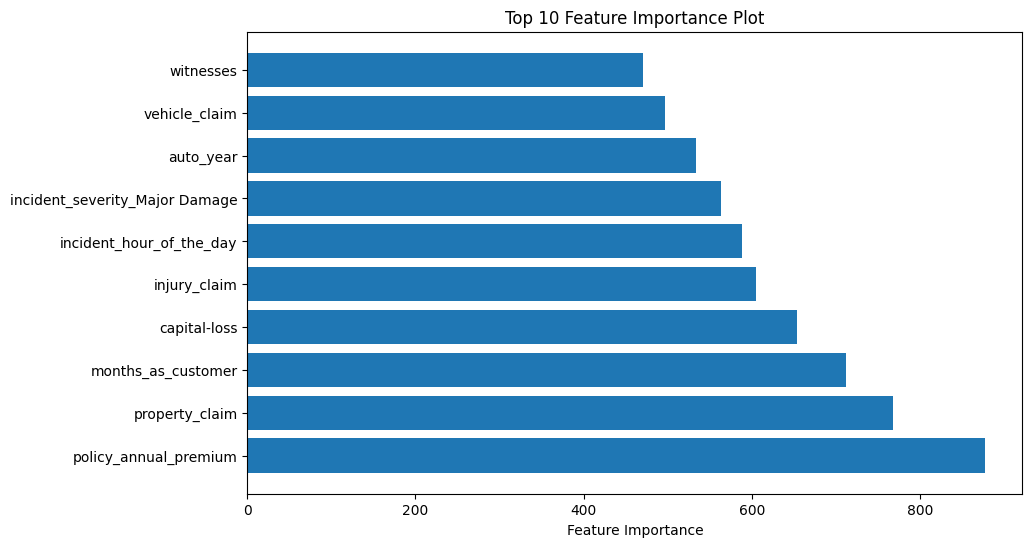

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = final_model.feature_importances_

# Sort the features by importance and select the top 10
top_10_indices = (-feature_importance).argsort()[:10]
top_10_importance = feature_importance[top_10_indices]
top_10_feature_names = X_train.columns[top_10_indices]  # If you have column names

# Create a feature importance plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(10), top_10_importance, align='center')
plt.yticks(range(10), top_10_feature_names)
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance Plot')
plt.show()



In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Create an instance of the base estimator (e.g., DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_depth=5)

# Create a BaggingClassifier instance and fit the model
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# Make predictions on the test set
bagging_preds = bagging_model.predict(X_test)
bagging_train=bagging_model.predict(X_train)

# Calculate accuracy score
bagging_accuracy = accuracy_score(y_test, bagging_preds)
bagging_accuracy_train = accuracy_score(y_train, bagging_train)

print("Bagging Accuracy test:", bagging_accuracy)
print("Bagging Accuracy train :", bagging_accuracy_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy test: 0.9026548672566371
Bagging Accuracy train : 0.9297912713472486


In [ ]:
base_estimator = DecisionTreeClassifier()
bagging_params = {
    'n_estimators': [10, 50, 100],
    'base_estimator__max_depth': [None, 5, 10],
}
grid_bag=GridSearchCV(estimator=bagging_model ,param_grid=bagging_params ,cv=5)
grid_bag.fit(X_train,y_train)

print("The best performance is:",grid_bag.best_params_)

train_bag=grid_bag.predict(X_train)
test_bag=grid_bag.predict(X_test)

bagg_Accuracy=accuracy_score(y_test,test_bag)
baggg_accuracy=accuracy_score(y_train,train_bag)

print("The test accuracy is",bagg_Accuracy)
print("The train accuracy is",baggg_accuracy)

print(classification_report(y_test,test_bag))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

The best performance is: {'base_estimator__max_depth': None, 'n_estimators': 100}
The test accuracy is 0.9004424778761062
The train accuracy is 1.0
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       229
           1       0.90      0.90      0.90       223

    accuracy                           0.90       452
   macro avg       0.90      0.90      0.90       452
weighted avg       0.90      0.90      0.90       452



AUC-ROC: 0.9484109111559325


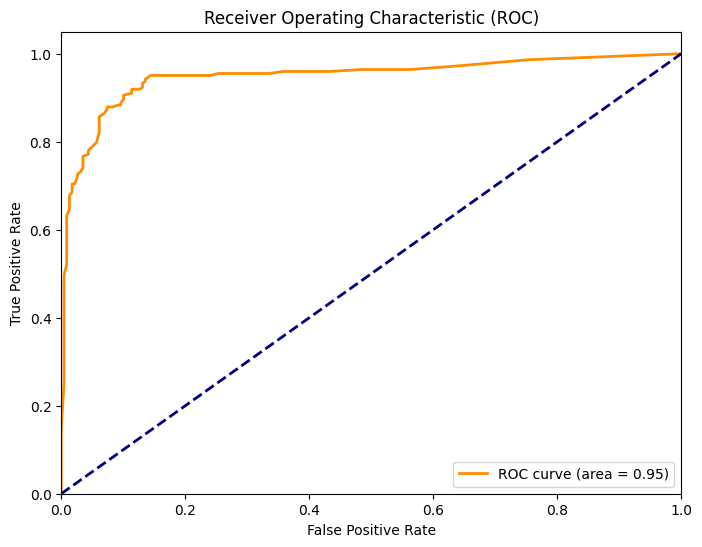

Confusion Matrix (Test Set):
 [[206  23]
 [ 22 201]]


In [ ]:

# Calculate the probability scores for the positive class (class 1)
y_test_prob_bag = grid_bag.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_bag)

# Calculate AUC
roc_auc_bag = auc(fpr, tpr)

# Print AUC-ROC score
print("AUC-ROC:", roc_auc_bag)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_bag))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Generate and print the confusion matrix
confusion_matrix_bag = confusion_matrix(y_test, test_bag)
print("Confusion Matrix (Test Set):\n", confusion_matrix_bag)



In [ ]:
num_trees = bagging_model.n_estimators
print(f"Number of trees in the Bagging model: {num_trees}")

Number of trees in the Bagging model: 100


In [ ]:
from xgboost import XGBClassifier
#XGBOOST Classifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train, verbose=False)
print("XGBClassifier Score :")
model_xgb.score(X_test,y_test)

XGBClassifier Score :


0.8893805309734514

In [ ]:

from sklearn.model_selection import cross_val_score

xgboost_y_predicted = model_xgb.predict(X_test)
report = classification_report(y_test, xgboost_y_predicted)

print(report)

scores = cross_val_score(model_xgb, X, y, cv=10, scoring='accuracy')
xgb_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % xgb_accuracy)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       229
           1       0.89      0.88      0.89       223

    accuracy                           0.89       452
   macro avg       0.89      0.89      0.89       452
weighted avg       0.89      0.89      0.89       452

Cross-Validated Accuracy: 0.81


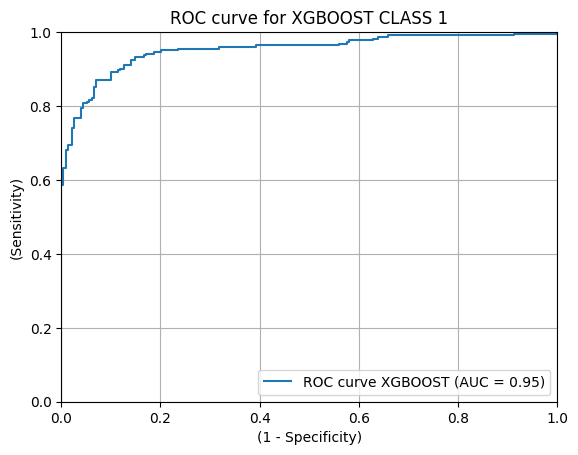

In [ ]:
xgb_pred_prob = model_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve XGBOOST (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for XGBOOST CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [ ]:
#LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda.fit(X_train, y_train)
print("Linear Discriminant Analysis Score :")
lda.score(X_test,y_test)

Linear Discriminant Analysis Score :


0.8628318584070797

In [ ]:
lda_y_predicted = lda.predict(X_test)
report = classification_report(y_test, lda_y_predicted)
print(report)

scores = cross_val_score(lda, X, y, cv=10, scoring='accuracy')
lda_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % lda_accuracy)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       229
           1       0.86      0.86      0.86       223

    accuracy                           0.86       452
   macro avg       0.86      0.86      0.86       452
weighted avg       0.86      0.86      0.86       452

Cross-Validated Accuracy: 0.84


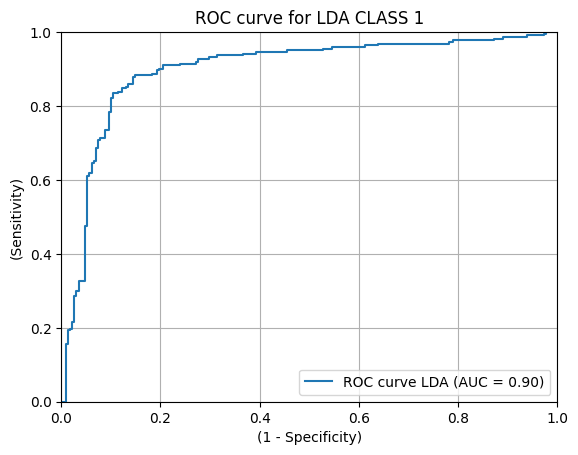

In [ ]:
lda_pred_prob = lda.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lda_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LDA (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for LDA CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn import neighbors

#K-Nearest Neighbors
print("KNN Score :")
KNNClassifier = neighbors.KNeighborsClassifier(n_neighbors=12, weights='distance')
KNNClassifier.fit(X=X_train,y=y_train)
KNNClassifier.score(X_test,y_test)

KNN Score :


0.6216814159292036

In [ ]:
KNN_y_predicted = KNNClassifier.predict(X_test)
class_names = np.unique(np.array(y_test))
confusion_matrix(y_test, KNN_y_predicted)

array([[ 62, 167],
       [  4, 219]])

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

print(classification_report(y_test, KNN_y_predicted))

scores = cross_val_score(KNNClassifier, X, y, cv=10, scoring='accuracy')
knn_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % knn_accuracy)

              precision    recall  f1-score   support

           0       0.94      0.27      0.42       229
           1       0.57      0.98      0.72       223

    accuracy                           0.62       452
   macro avg       0.75      0.63      0.57       452
weighted avg       0.76      0.62      0.57       452

Cross-Validated Accuracy: 0.75


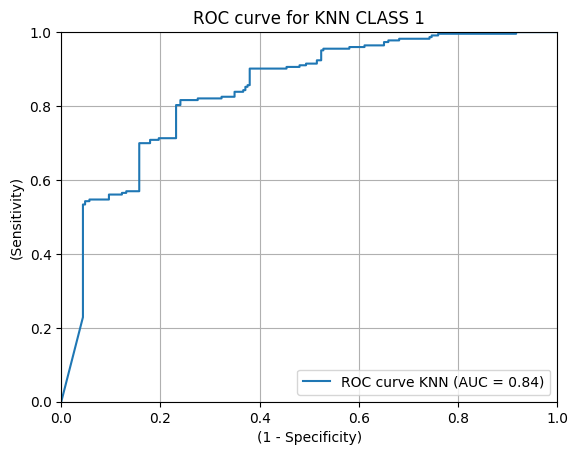

In [ ]:
from sklearn.metrics import roc_curve, auc
knn_pred_prob = KNNClassifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve KNN (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for KNN CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
#Naive Bayes Classifier
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)
print("Naive Bayes Classifier Score :")
NBClassifier.score(X_test,y_test)

Naive Bayes Classifier Score :


0.7323008849557522

In [ ]:
nb_y_predicted = NBClassifier.predict(X_test)
report = classification_report(y_test, nb_y_predicted)

print(report)

scores = cross_val_score(NBClassifier, X, y, cv=10, scoring='accuracy')
nb_accuracy = scores.mean()
print('Cross-Validated Accuracy: %0.2f' % nb_accuracy)

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       229
           1       0.70      0.79      0.74       223

    accuracy                           0.73       452
   macro avg       0.74      0.73      0.73       452
weighted avg       0.74      0.73      0.73       452

Cross-Validated Accuracy: 0.62


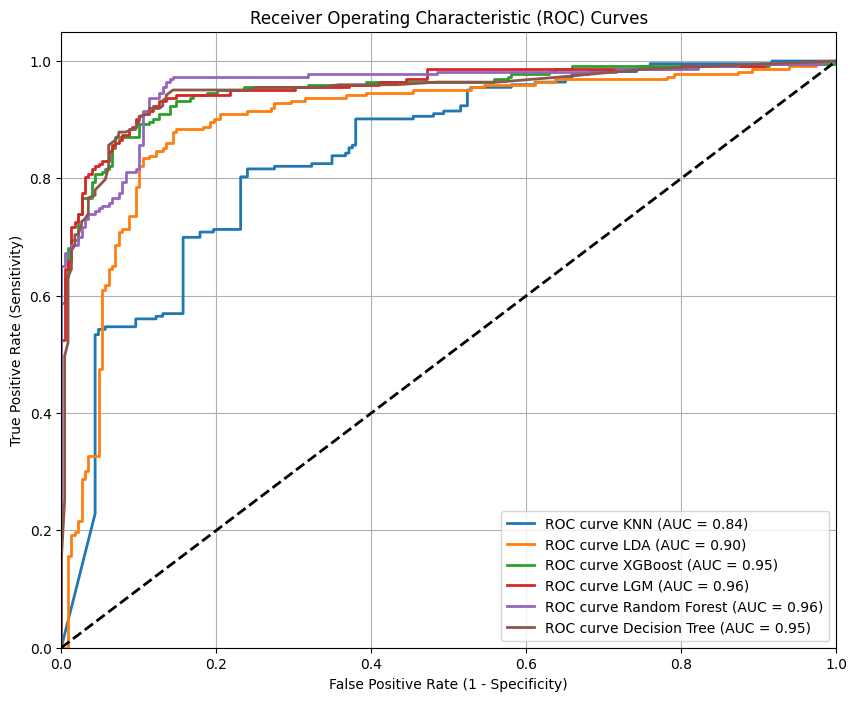

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define your model names, ROC curves, and AUC scores
model_names = ["KNN", "LDA", "XGBoost", "LGM", "Random Forest","Decision Tree"]
roc_curves = [knn_pred_prob, lda_pred_prob, xgb_pred_prob, y_pred_prob, y_test_prob_rf,y_test_prob_bag]
auc_scores = [roc_auc, roc_auc_rf]  # Replace with your actual AUC scores

# Create a figure
plt.figure(figsize=(10, 8))

# Plot ROC curves for each model
for i in range(len(model_names)):
    fpr, tpr, thresholds = roc_curve(y_test, roc_curves[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve {} (AUC = {:.2f})'.format(model_names[i], roc_auc))

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()


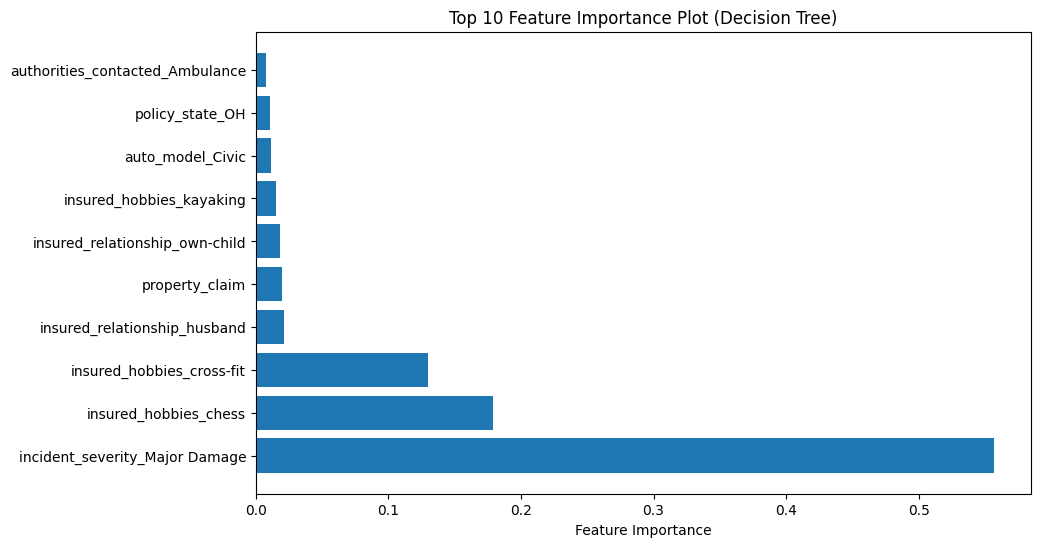

In [ ]:
# Create a Decision Tree model and fit it to your data
decision_tree_model = DecisionTreeClassifier(max_depth=5)
decision_tree_model.fit(X_train, y_train)

# Get feature importances
feature_importance = decision_tree_model.feature_importances_

# Sort the features by importance and select the top 10
top_10_indices = (-feature_importance).argsort()[:10]
top_10_importance = feature_importance[top_10_indices]
top_10_feature_names = X_train.columns[top_10_indices]  # If you have column names

# Create a feature importance plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(range(10), top_10_importance, align='center')
plt.yticks(range(10), top_10_feature_names)
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance Plot (Decision Tree)')
plt.show()


In [ ]:
test_target = y_test.copy()
test_target.reset_index(drop=True, inplace=True)
test_target = test_target.replace({1:'Y', 0:'N'})

predicted_target = decision_tree_model.predict(X_test)
predicted_target = pd.Series(predicted_target).replace({1:'Y', 0:'N'})

In [ ]:
ranks=pd.DataFrame(data=
                   {
                       'RealClass':test_target,
                       'PredictedClass':predicted_target,
                       'rank':xgb_pred_prob
                   })
ranks.sort_values(by=['rank'],ascending=False,inplace=True)
ranks.head()

,RealClass,PredictedClass,rank
134,Y,Y,0.999972
282,Y,Y,0.999957
318,Y,Y,0.999955
123,Y,Y,0.999946
332,Y,Y,0.999931


In [ ]:
top = ranks.where(ranks['rank']>0.5,).dropna()
top.head()

,RealClass,PredictedClass,rank
134,Y,Y,0.999972
282,Y,Y,0.999957
318,Y,Y,0.999955
123,Y,Y,0.999946
332,Y,Y,0.999931




**Insights:**

1. **High Model Performance:** The decision tree model exhibits strong performance with high test accuracy (90.04%) and excellent train accuracy (100%). This suggests that the model has learned the training data well.

2. **Feature Importance:** Several features have been identified as important for the decision tree model, with incident severity, insurance hobbies (chess and cross-fit), insured relationships (husband and own child), property claim, insurance hobby (kayaking), auto model (civic), policy state (OH), and authorized contacted ambulance being the top features. These features play a crucial role in making predictions, indicating their relevance in fraud detection.

3. **High ROC Curve Score:** The ROC curve score of 0.95 indicates that the model is good at distinguishing between the positive and negative classes, which is crucial for fraud detection.

4. **Test Set Performance:** The model's precision, recall, and F1-score are all around 0.90, indicating a balanced performance in terms of both precision and recall.

5. **Confusion Matrix:** The confusion matrix shows that the model correctly classifies a high number of true positives and true negatives, with relatively low numbers of false positives and false negatives.

**Recommendations:**

1. **Feature Importance:** Given the identified important features, it's crucial to continue monitoring and collecting data related to these features. Any changes or anomalies in these features might be indicators of potential fraud.

2. **Data Quality:** Ensure data quality and consistency. Clean and accurate data is essential for reliable fraud detection.

3. **Model Deployment:** Consider deploying the decision tree model in a production environment for real-time fraud detection. Regularly update the model as new data becomes available.

4. **Ensemble Methods:** Explore the use of ensemble methods (e.g., Random Forest or XGBoost) to potentially improve model performance further.

**Findings:**

The decision tree model, using the identified important features, demonstrates a strong capability to detect fraud claims with high accuracy and balanced precision and recall.

**Conclusion:**

In conclusion, the decision tree model has shown promising results in claim fraud detection. It is capable of accurately classifying claims as fraudulent or legitimate. By focusing on the important features identified by the model, you can improve the fraud detection process and enhance your insurance fraud prevention efforts. Regular model monitoring and updates are essential to maintain the model's effectiveness over time. Additionally, you may explore more advanced machine learning techniques and ensemble methods to further improve the model's performance.